# 0. Imports

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

## 0.1. Helper Functions

In [28]:
# CAGR calculation. Returns a decimal value (not percentage)

def cagr(end_value, start_value, time):
    cagr_ = ((end_value/start_value)**(1/time))-1

    return cagr_

In [36]:
def plot_dist(results, cotacao=True):

    g = sns.displot(
        results, 
        rug=True, 
        rug_kws={"color": "red", "alpha": 1, "linewidth": 1},
        kind='hist', 
        height=5, 
        aspect=1.2
        );

    if cotacao:
        g.set_axis_labels("Cotação em 2026", "no. de cenários");

        print('Mean: {} | Median: {} | Std: {}'.format(round(np.mean(results), 2), round(np.median(results), 2), round(np.std(results), 2)))

    else:
        g.set_axis_labels("CAGR (%) em 2026", "no. de cenários");

        print('Mean: {}% | Median: {}% | Std: {}%'.format(round(np.mean(results), 2), round(np.median(results), 2), round(np.std(results), 2)))

    return None

# 1. Sensitivity Analysis

## 1.1 Input Data (premises)

In [37]:
ebitda2021 = 91155.0 # in millions
dl_ebitda = -1.10
shares = 675 # in millions, year 2026
growth_rate = range(10, 20, 1) # ebitda growth rate from 2022-2026
exit_multiple = range(10, 20, 1) # ev/ebitda exit multiple in 2026
t = 5 # years of forecast
cotacao_atual = 2157.31

## 1.2 Building the sensitivity matrix as a pandas dataframe

In [38]:
sensitivity = pd.DataFrame(index = exit_multiple, columns = growth_rate)

cotacoes = []

for g in growth_rate:
    
    # convert growth rate to decimal value
    g_dec = g/100.0

    # grow ebitda from 2022 through 2026
    ebitda2026 = ebitda2021*((1+g_dec)**t)


    for m in exit_multiple:

        # use exit multiple to calculate ev
        ev = m*ebitda2026

        # use dl/ebitda to calculate dl
        dl = dl_ebitda*ebitda2026

        # use dl to calculate mkt cap
        mkt_cap = ev-dl

        # use shares to calculate cotacao (mktcap/shares)
        cotacao = round(mkt_cap/shares, 2)

        # store cotacao in the dataframe
        sensitivity.loc[m][g] = cotacao

        cotacoes.append(cotacao)

# print dataframe
sensitivity.rename(str, axis='columns', inplace=True) # change columns name types
sensitivity.columns = sensitivity.columns.map(lambda x: x+'%') # format columns names

sensitivity.index = sensitivity.index.astype('str') # change index name type
sensitivity.index = sensitivity.index.map(lambda x: x+'x') # format index names

#print('X: Crescimento do EBITDA')
#print('Y: Múltiplo EV/EBITDA em 2026')
sensitivity.reset_index(inplace=True)
sensitivity.rename(columns={'index':'ev/ebitda'}, inplace=True)

## 1.3 Distribution of price targets

Mean: 4172.1 | Median: 4110.15 | Std: 933.53


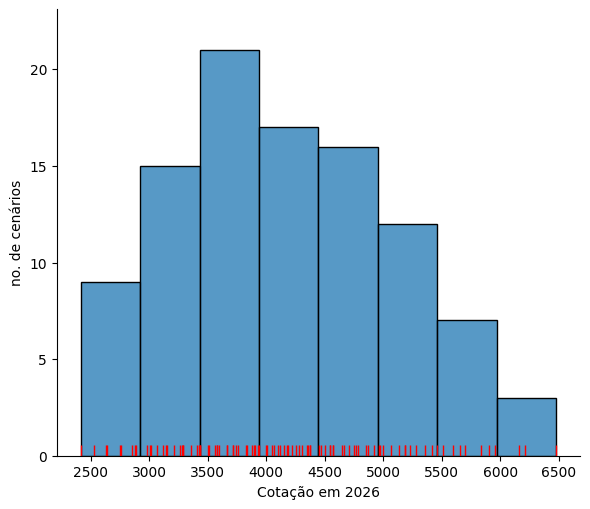

In [39]:
plot_dist(cotacoes)

## 1.4 Distribution of possible returns

### 1.4.1 CAGR calculation for each target price

In [40]:
returns = [] # initialize list to store returns

for c in cotacoes:
    returns.append(cagr(c,cotacao_atual,t)*100.0) # store returns as percentage

### 1.4.2. Plotting distribution chart (of returns)

Mean: 13.64% | Median: 13.76% | Std: 5.13%


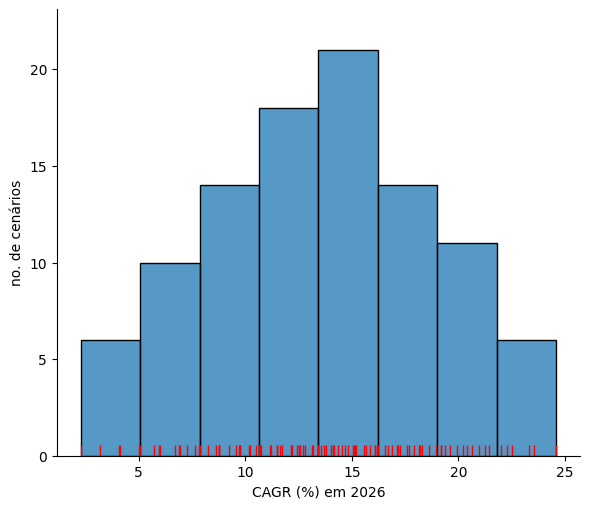

In [41]:
plot_dist(returns, cotacao=False)